## Data eda
Using a checkpoint file to look at some of the data and see best methods for cleaning and visuals. 

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('discogs_2007.csv', low_memory=False) 
#df.drop(columns=['Unnamed: 0'])

In [5]:
print(df.shape)

(12883, 12)


In [7]:
# view all columns
pd.set_option('display.max_columns', None)
# view all rows
pd.set_option('display.max_rows', None)

In [9]:
# prints a report listing all column names, number of null values & the datatype in the column.
print(df.info(), '\n-----')
# prints the number of nulls per column
print(df.isnull().sum(), '\n-----')
# prints the descriptive statistics including the min and max values, the numbers at each quartile as well as the standard deviation of the data. This is useful in identifying outliers.
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12883 entries, 0 to 12882
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12883 non-null  int64 
 1   release_id  12883 non-null  int64 
 2   album       12882 non-null  object
 3   artist      12883 non-null  object
 4   title       2883 non-null   object
 5   year        12883 non-null  int64 
 6   country     12809 non-null  object
 7   duration    569 non-null    object
 8   genre       12882 non-null  object
 9   style       10996 non-null  object
 10  source      12883 non-null  object
 11  lyrics      733 non-null    object
dtypes: int64(3), object(9)
memory usage: 1.2+ MB
None 
-----
Unnamed: 0        0
release_id        0
album             1
artist            0
title         10000
year              0
country          74
duration      12314
genre             1
style          1887
source            0
lyrics        12150
dtype: int64 
-----
         

In [11]:
df.nunique()

Unnamed: 0    12883
release_id     8631
album          8321
artist         7237
title          1990
year              1
country         106
duration        249
genre           292
style          2893
source            1
lyrics          394
dtype: int64

In [9]:
# Possible 'joining keys' for merging and duplicate checking
print(df.duplicated(subset=['title']).sum(), '\n------')
print(df.duplicated(subset=['id']).sum(), '\n-----')
#print(df.duplicated(subset=['release_id']).sum(), '\n-----')

1226 
------
1506 
-----


In [13]:
print(df['artist'].value_counts().head(10))
print(df['genre'].value_counts(normalize=True))

artist
Various                            1336
Chrisye                             417
David Mitchell (3), Robert Webb     281
Γιάννης Πάριος                      124
17 Pygmies                           60
Ange (4)                             60
Unknown Artist                       58
Zombies Eat Brains                   51
Everybody's Talking                  48
Trío Zapatista                       44
Name: count, dtype: int64
genre
Electronic                                                                                      0.239016
Rock                                                                                            0.228691
Non-Music                                                                                       0.047663
Pop                                                                                             0.047198
Folk, World, & Country                                                                          0.043006
Rock, Pop                           

In [15]:
# We don't need this
#df.drop(columns=['track_position'], inplace=True)

# Fix dates to be more granular for processing
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Create individual columns
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

# Fill missing discogs 'release_date' using 'year' column
df['release_date_fallback'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

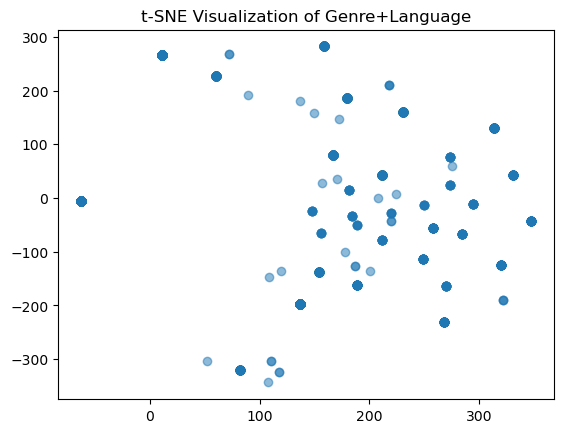

In [17]:
# identify relevant columns
#relevant_columns = ['col1', 'col2', 'col3']
# create dummy variable columns
#dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float) 
# check result
#df.head()

from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Does one-hot encoding work?
ohe = OneHotEncoder()
X = ohe.fit_transform(df[['genre', 'language']].fillna("Unknown")).toarray()

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.5)
plt.title("t-SNE Visualization of Genre+Language")
plt.show()

## Data visualization

In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

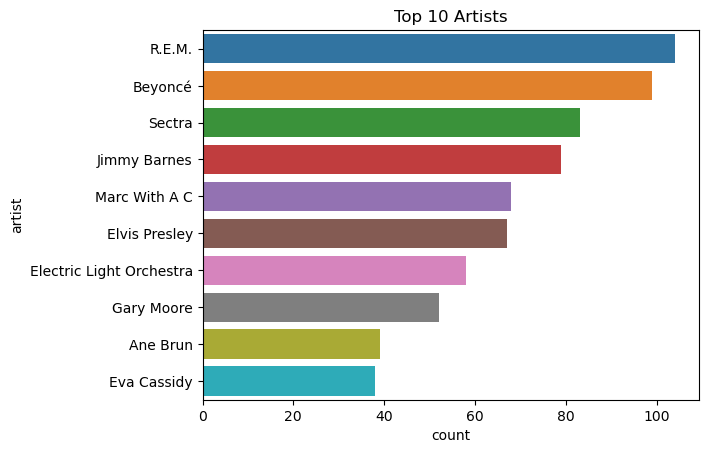

In [21]:
sns.countplot(data=df, y='artist', order=df['artist'].value_counts().iloc[:10].index)
plt.title('Top 10 Artists')
plt.show()

<Axes: title={'center': 'Top 10 Genres'}, ylabel='genre'>

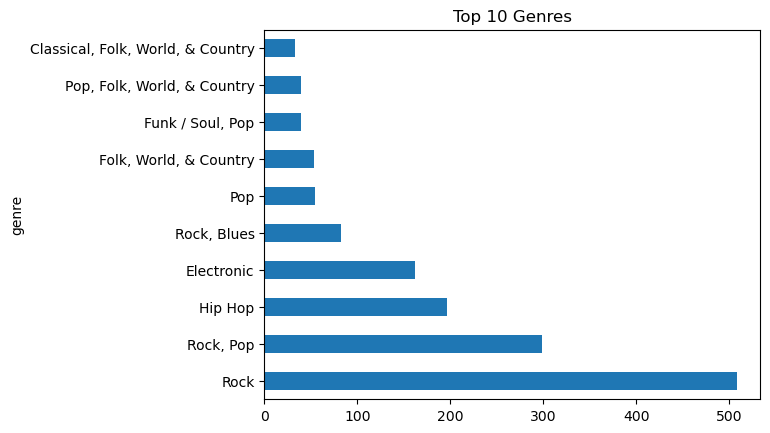

In [23]:
# Genre distribution
df['genre'].value_counts().iloc[:10].plot(kind='barh', title='Top 10 Genres')

Text(0.5, 1.0, 'Distribution of Sentiment Scores')

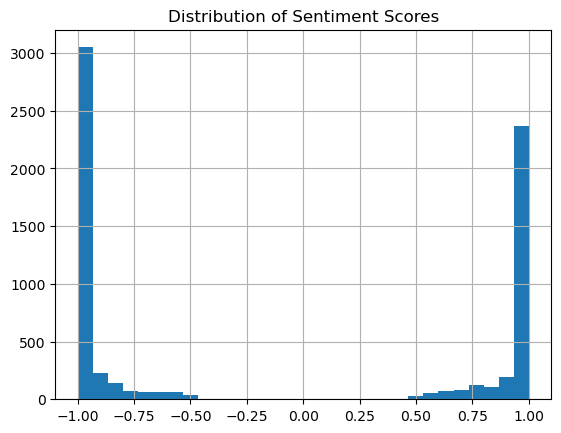

In [27]:
# incorporating sentiment analysis - need to use output_clean_lyrics or tokenize_mini_w_sentiment
# Histogram
df['sentiment_score'].hist(bins=30)
plt.title('Distribution of Sentiment Scores')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Rock'),
  Text(1, 0, 'Electronic'),
  Text(2, 0, 'Pop'),
  Text(3, 0, 'Electronic, Rock'),
  Text(4, 0, 'Hip Hop'),
  Text(5, 0, 'Rock, Pop'),
  Text(6, 0, 'Rock, Folk, World, & Country'),
  Text(7, 0, 'Funk / Soul, Pop'),
  Text(8, 0, 'Funk / Soul'),
  Text(9, 0, 'Electronic, Pop'),
  Text(10, 0, 'Jazz, Latin, Funk / Soul'),
  Text(11, 0, 'Non-Music'),
  Text(12, 0, 'Reggae'),
  Text(13, 0, 'Blues'),
  Text(14, 0, 'Folk, World, & Country'),
  Text(15, 0, 'Jazz'),
  Text(16, 0, 'Classical'),
  Text(17, 0, 'Jazz, Stage & Screen'),
  Text(18, 0, 'Electronic, Folk, World, & Country, Funk / Soul, Hip Hop, Latin, Pop, Reggae, Rock'),
  Text(19, 0, 'Electronic, Funk / Soul'),
  Text(20, 0, 'Jazz, Rock, Pop'),
  Text(21, 0, 'Rock, Blues'),
  Text(22, 0, 'Classical, Folk, World, & Country'),
  Text(23, 0, 'Pop, Folk, World, & Countr

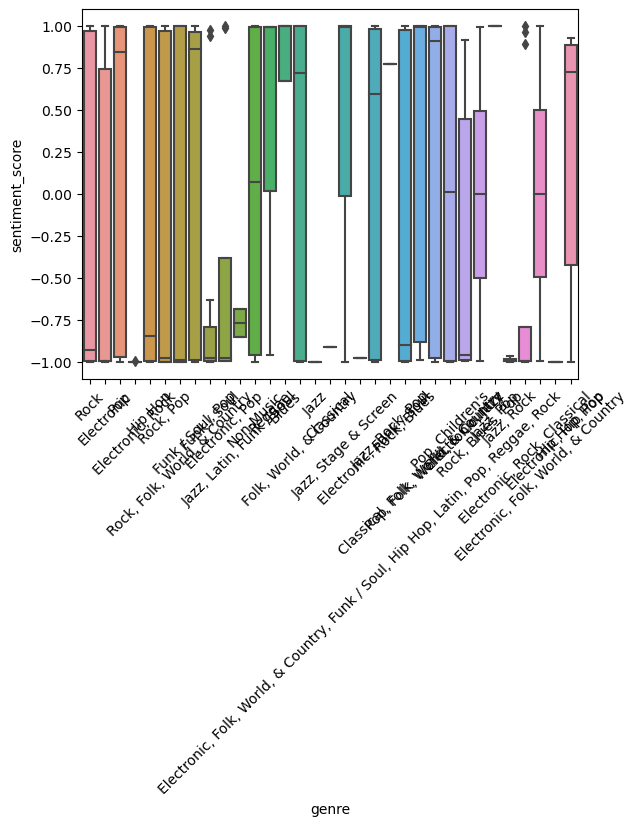

In [29]:
# Boxplot - change plot size to see better
sns.boxplot(data=df, x='genre', y='sentiment_score')
plt.xticks(rotation=45)

<Axes: xlabel='genre'>

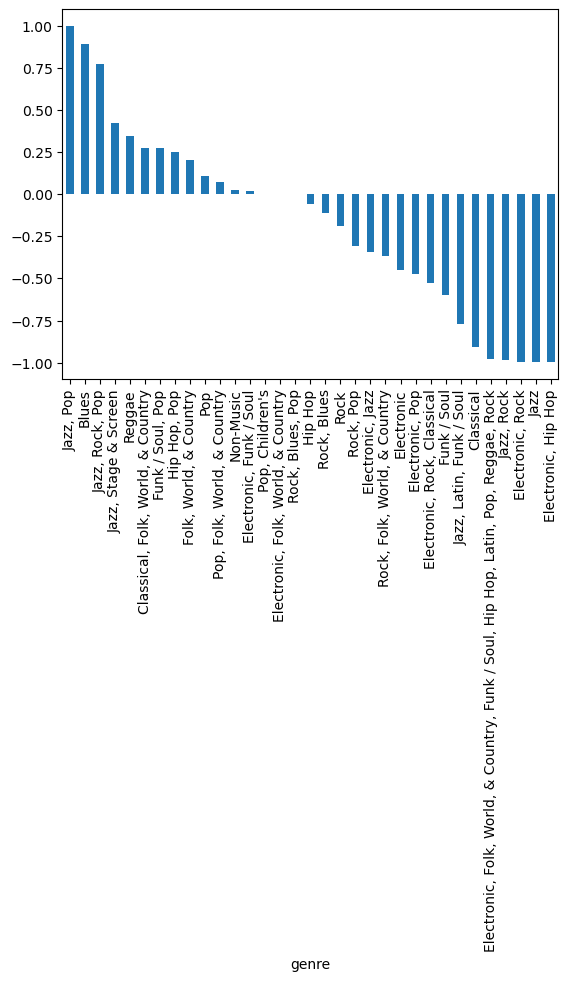

In [31]:
# Mean sentiment
df.groupby('genre')['sentiment_score'].mean().sort_values(ascending=False).plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Rock'),
  Text(1, 0, 'Electronic'),
  Text(2, 0, 'Pop'),
  Text(3, 0, 'Electronic, Rock'),
  Text(4, 0, 'Hip Hop'),
  Text(5, 0, 'Rock, Pop'),
  Text(6, 0, 'Rock, Folk, World, & Country'),
  Text(7, 0, 'Funk / Soul, Pop'),
  Text(8, 0, 'Funk / Soul'),
  Text(9, 0, 'Electronic, Pop'),
  Text(10, 0, 'Jazz, Latin, Funk / Soul'),
  Text(11, 0, 'Non-Music'),
  Text(12, 0, 'Reggae'),
  Text(13, 0, 'Blues'),
  Text(14, 0, 'Folk, World, & Country'),
  Text(15, 0, 'Jazz'),
  Text(16, 0, 'Classical'),
  Text(17, 0, 'Jazz, Stage & Screen'),
  Text(18, 0, 'Electronic, Folk, World, & Country, Funk / Soul, Hip Hop, Latin, Pop, Reggae, Rock'),
  Text(19, 0, 'Electronic, Funk / Soul'),
  Text(20, 0, 'Jazz, Rock, Pop'),
  Text(21, 0, 'Rock, Blues'),
  Text(22, 0, 'Classical, Folk, World, & Country'),
  Text(23, 0, 'Pop, Folk, World, & Countr

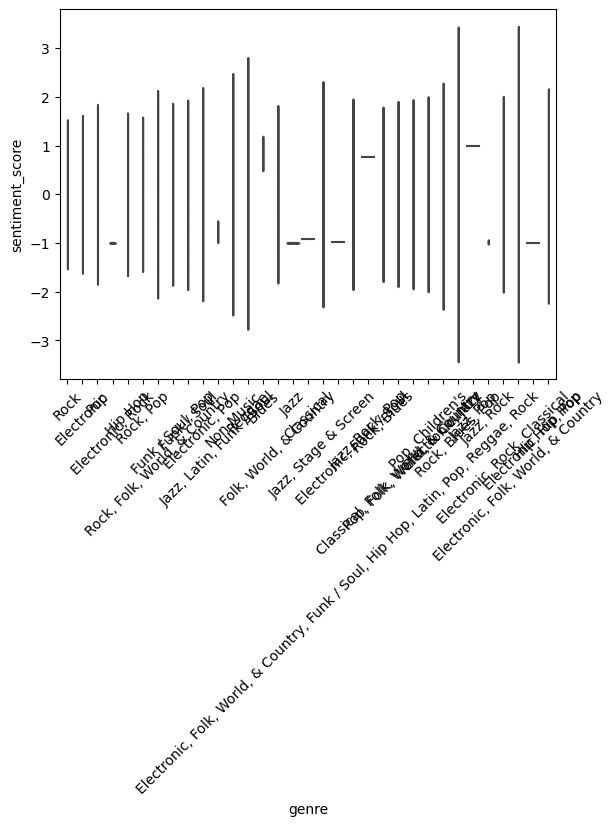

In [33]:
# Violin plot
sns.violinplot(data=df, x='genre', y='sentiment_score', inner='quartile')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Average Sentiment Score per Year')

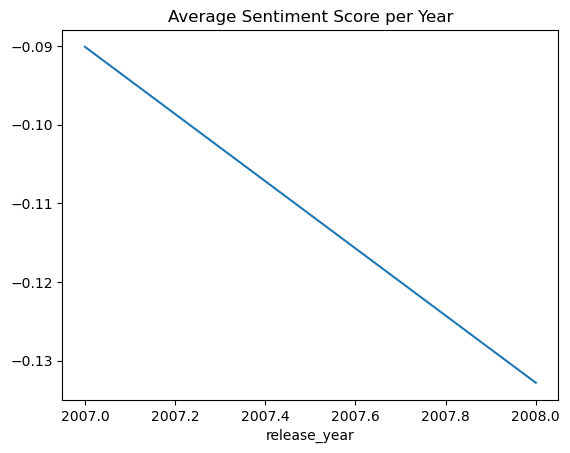

In [35]:
df.groupby('release_year')['sentiment_score'].mean().plot()
plt.title("Average Sentiment Score per Year")

# Maybe play with this one a little more to show timeline trend of sentiment, 
# see if downward progression true

Text(0.5, 1.0, 'Release Frequency Heatmap')

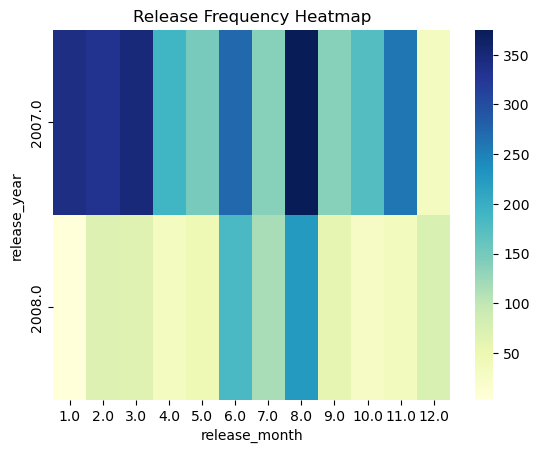

In [37]:
heatmap_data = df.groupby(['release_year', 'release_month']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Release Frequency Heatmap")

In [49]:
# Frequency encoding - replace each category with the frequency of its occurrence
freq_map = df['genre'].value_counts().to_dict()
df['genre_freq'] = df['genre'].map(freq_map)

Text(0.5, 1.0, 'Number of Songs Released per Year')

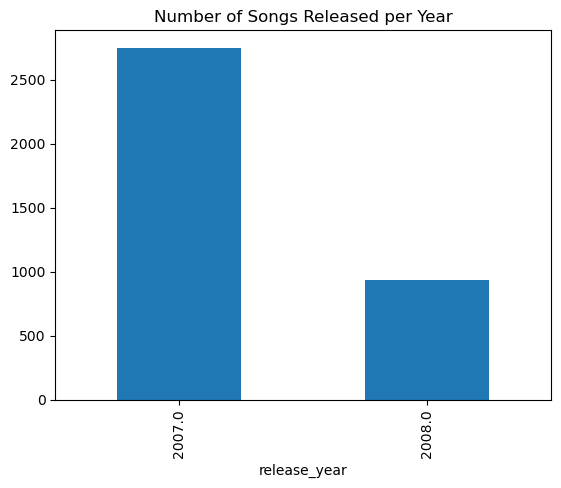

In [39]:
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Songs Released per Year")
# Whoop! There's some 2019 songs in there!!!
# Not accurate, due to the fact that this is a sample, but should be checked for the full dataset